# Descriptive Analysis

**Inspect the volume**

1. Line chart: the number of posts by month/week/day

**Inspect the topic / clusters: what themes are the most popular during volume burst?**

2. Distribution of topics / clusters by month/week/day (weight: length)

**Inspect the similarity between the two corpora: are they going to be more similar or not after volume burst?**

3. Cosine Similarity of the vectors of topics/ clusters change by day
4. Divergence over time by day




## Preparation

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cl = pd.read_csv("/content/drive/MyDrive/DBCommunity/saved_data/clustering_aca_tech0224.csv", index_col='Unnamed: 0')
tm = pd.read_csv("/content/drive/MyDrive/DBCommunity/saved_data/topic_models_tech_aca.csv")
cl.shape, tm.shape

((17969, 25), (17969, 12))

In [5]:
# encode the clusters
from sklearn.preprocessing import OneHotEncoder

In [6]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cl[['cluster_wordembedding']])
cl_ohe = pd.DataFrame(ohe.transform(cl[['cluster_wordembedding']]).toarray()).rename(columns={i:"cluster_{}".format(i) for i in range(5)})

cl_ohe

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
17964,1.0,0.0,0.0,0.0,0.0
17965,0.0,0.0,0.0,1.0,0.0
17966,1.0,0.0,0.0,0.0,0.0
17967,0.0,1.0,0.0,0.0,0.0


In [7]:
tm.rename(columns={"title": "Title"}, inplace=True)
tm.head()

,Title,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,精华\n\n\n \n ...,"[(5, 0.6743936), (6, 0.074725136), (7, 0.14640...",0.0,0.0,0.0,0.000000,0.0,0.674394,0.074725,0.146408,0.000000,0.099353
1,精华\n\n\n \n ...,"[(3, 0.16768518), (5, 0.68521994), (8, 0.11947...",0.0,0.0,0.0,0.167685,0.0,0.685220,0.000000,0.000000,0.119471,0.000000
2,精华\n\n\n \n ...,"[(3, 0.094433896), (5, 0.80542123), (9, 0.0936...",0.0,0.0,0.0,0.094434,0.0,0.805421,0.000000,0.000000,0.000000,0.093672
3,精华\n\n\n \n ...,"[(3, 0.1702897), (5, 0.7335712), (9, 0.08500593)]",0.0,0.0,0.0,0.170290,0.0,0.733571,0.000000,0.000000,0.000000,0.085006
4,精华\n\n\n \n ...,"[(5, 0.24346398), (7, 0.14090803), (9, 0.61150...",0.0,0.0,0.0,0.000000,0.0,0.243464,0.000000,0.140908,0.000000,0.611502


In [8]:
df = pd.concat([cl,cl_ohe,tm], axis=1)
df.shape, df.columns

((17969, 42),
 Index(['Title', 'Text', 'Author', 'Reply', 'LastReply', 'PublishTime', 'Like',
        'Collect', 'Repost', 'Community_name', 'seg_text', 'tokenized_text',
        'Reply_Year', 'Reply_Month', 'Reply_Day', 'Pub_Year', 'Pub_Month',
        'Pub_Day', 'normalized_text', 'tokenized_sentences', 'TopPost',
        'Length', 'Aca', 'doc_embedding', 'cluster_wordembedding', 'cluster_0',
        'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'Title', 'topics',
        'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
        'topic_6', 'topic_7', 'topic_8', 'topic_9'],
       dtype='object'))

In [9]:
# Select data from 2021 to 2023
df = df[(df['PublishTime'] >= '2021-01-01') & (df['PublishTime'] <= '2023-12-31')]
df.shape

(15004, 42)

## Inspect the Volume

- Create line chart for number of posts by month/week in the two communities.

- Identify volume bursts

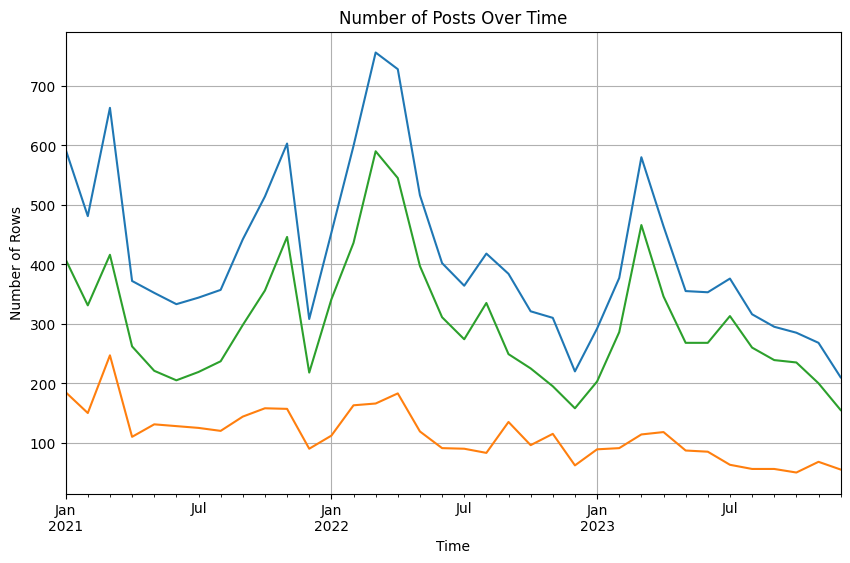

In [ ]:
# Convert 'PublishTime' to datetime type
df['PublishTime'] = pd.to_datetime(df['PublishTime'])

# Group by the desired time period and count the rows.
time_series = df.groupby(pd.Grouper(key='PublishTime', freq='M')).size()
time_series_aca = df[df['Aca']==1].groupby(pd.Grouper(key='PublishTime', freq='M')).size()
time_series_tech = df[df['Aca']==0].groupby(pd.Grouper(key='PublishTime', freq='M')).size()

# Plotting the time series
plt.figure(figsize=(10, 6))
time_series.plot(kind='line', label="Overall")
time_series_aca.plot(kind='line', label="Women in Academia")
time_series_tech.plot(kind='line', label="Women in Tech")

plt.title('Number of Posts Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rows')
plt.grid(True)
plt.show()

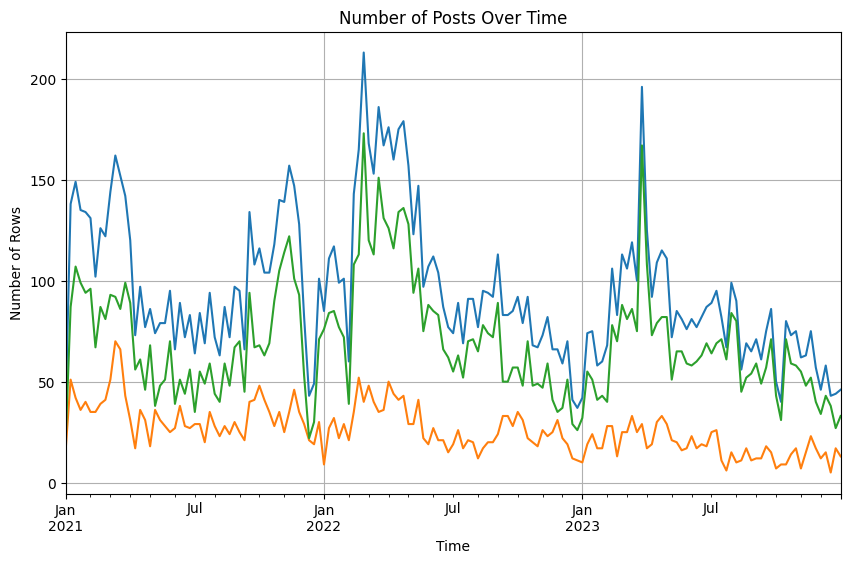

In [ ]:
# Convert 'PublishTime' to datetime type
df['PublishTime'] = pd.to_datetime(df['PublishTime'])

# Group by the desired time period and count the rows.
time_series = df.groupby(pd.Grouper(key='PublishTime', freq='W')).size()
time_series_aca = df[df['Aca']==1].groupby(pd.Grouper(key='PublishTime', freq='W')).size()
time_series_tech = df[df['Aca']==0].groupby(pd.Grouper(key='PublishTime', freq='W')).size()

# Plotting the time series
plt.figure(figsize=(10, 6))
time_series.plot(kind='line', label="Overall")
time_series_aca.plot(kind='line', label="Women in Academia")
time_series_tech.plot(kind='line', label="Women in Tech")

plt.title('Number of Posts Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rows')
plt.grid(True)
plt.show()

In [12]:
# Assuming 'PublishTime' has already been converted to datetime type
# Group by month and count the posts
monthly_counts = df.groupby(pd.Grouper(key='PublishTime', freq='M')).size()

# Calculate the difference between each month and its previous and next months
previous_month = monthly_counts.shift(1)
next_month = monthly_counts.shift(-1)

# Identify peak months
peak_months = monthly_counts[(monthly_counts > previous_month) & (monthly_counts > next_month)]

# The index of 'peak_months' now contains the months that are considered "peaks"
peak_months

PublishTime
2021-03-31    663
2021-11-30    603
2022-03-31    756
2022-08-31    418
2023-03-31    580
2023-07-31    376
dtype: int64

In [13]:
# Assuming 'PublishTime' has already been converted to datetime type
# Group by week and count the posts
weekly_counts = df.groupby(pd.Grouper(key='PublishTime', freq='W')).size()

# Calculate the difference between each week and its previous and next weeks
previous_week = weekly_counts.shift(1)
next_week = weekly_counts.shift(-1)

# Identify peak weeks
peak_weeks = weekly_counts[(weekly_counts > previous_week) & (weekly_counts > next_week)]

# The index of 'peak_weeks' now contains the weeks that are considered "peaks"
len(peak_weeks)

49

In [14]:
# Assuming 'PublishTime' has already been converted to datetime type
# Group by day and count the posts
dayly_counts = df.groupby(pd.Grouper(key='PublishTime', freq='D')).size()

# Calculate the difference between each day and its previous and next days
previous_day = dayly_counts.shift(1)
next_day = dayly_counts.shift(-1)

# Identify peak days
peak_days = dayly_counts[(dayly_counts > previous_day) & (dayly_counts > next_day)]

# The index of 'peak_days' now contains the days that are considered "peaks"
len(peak_days)

312

In [15]:
# Convert the index of peak_months (which is of datetime type) to a format that matches the 'PublishTime' column
peak_month_indices = peak_months.index
peak_week_indices = peak_weeks.index
peak_day_indices = peak_days.index

# Create a boolean column in 'df' that marks whether each row is in a peak month
# First, extract just the year and month part of 'PublishTime' for comparison
df['IsPeakMonth'] = df['PublishTime'].dt.to_period('M').isin(peak_month_indices.to_period('M')).astype(int)
df['IsPeakWeek'] = df['PublishTime'].dt.to_period('W').isin(peak_week_indices.to_period('W')).astype(int)
df['IsPeakDay'] = df['PublishTime'].dt.to_period('D').isin(peak_day_indices.to_period('D')).astype(int)

df[['IsPeakMonth','IsPeakWeek', 'IsPeakDay']].head()

,IsPeakMonth,IsPeakWeek,IsPeakDay
9,1,0,0
11,0,0,1
19,0,0,0
20,0,0,0
23,1,1,0


In [16]:
peak_week_indices

DatetimeIndex(['2021-01-17', '2021-02-21', '2021-03-14', '2021-04-18',
               '2021-05-02', '2021-05-30', '2021-06-13', '2021-06-27',
               '2021-07-11', '2021-07-25', '2021-08-15', '2021-08-29',
               '2021-09-19', '2021-10-03', '2021-10-31', '2021-11-14',
               '2021-12-26', '2022-01-16', '2022-01-30', '2022-02-27',
               '2022-03-20', '2022-04-03', '2022-04-24', '2022-05-15',
               '2022-06-05', '2022-07-10', '2022-08-14', '2022-09-04',
               '2022-10-02', '2022-10-16', '2022-11-13', '2022-12-11',
               '2023-01-15', '2023-02-12', '2023-02-26', '2023-03-12',
               '2023-03-26', '2023-04-23', '2023-05-14', '2023-06-04',
               '2023-07-09', '2023-07-30', '2023-08-20', '2023-09-03',
               '2023-09-24', '2023-10-15', '2023-10-29', '2023-11-19',
               '2023-12-10'],
              dtype='datetime64[ns]', name='PublishTime', freq=None)

## INnspect the topic/clusters by month/week

- calculate the summarized topics and clusters

- illustrate the distribution


In [17]:
df_by_month = pd.DataFrame(monthly_counts, columns=['counts'])
df_by_month.head()

,counts
PublishTime,
2021-01-31,593
2021-02-28,481
2021-03-31,663
2021-04-30,372
2021-05-31,352


In [1]:
def month_week_day(df_para):

    # Group by month (topic)
    topic_by_month = pd.DataFrame() # Initialize an empty DataFrame to hold the combined results

    # Iterate over each topic column and perform the calculation
    for i in range(10):  # Assuming topics are numbered from 0 to 9
        column_name = f'topic_{i}'

        # Perform the group and calculation for the current topic
        normalized_weighted_sum = df_para.groupby(df_para['PublishTime'].dt.to_period('M')).apply(
            lambda x: (x[column_name] * x['Length']).sum() / len(x))

        # Add the result to the topic_by_month DataFrame
        topic_by_month[column_name] = normalized_weighted_sum

    # Resetting index to make 'PublishTime' a column again if needed
    topic_by_month = topic_by_month.reset_index()


    # Group by week (topic)
    topic_by_week = pd.DataFrame() # Initialize an empty DataFrame to hold the combined results

    # Iterate over each topic column and perform the calculation
    for i in range(10):  # Assuming topics are numbered from 0 to 9
        column_name = f'topic_{i}'

        # Perform the group and calculation for the current topic
        normalized_weighted_sum = df_para.groupby(df_para['PublishTime'].dt.to_period('W')).apply(
            lambda x: (x[column_name] * x['Length']).sum() / len(x))

        # Add the result to the topic_by_week DataFrame
        topic_by_week[column_name] = normalized_weighted_sum

    # Resetting index to make 'PublishTime' a column again if needed
    topic_by_week = topic_by_week.reset_index()


    # Group by day (topic)
    topic_by_day = pd.DataFrame() # Initialize an empty DataFrame to hold the combined results

    # Iterate over each topic column and perform the calculation
    for i in range(10):  # Assuming topics are numbered from 0 to 9
        column_name = f'topic_{i}'

        # Perform the group and calculation for the current topic
        normalized_weighted_sum = df_para.groupby(df_para['PublishTime'].dt.to_period('D')).apply(
            lambda x: (x[column_name] * x['Length']).sum() / len(x))

        # Add the result to the topic_by_day DataFrame
        topic_by_day[column_name] = normalized_weighted_sum

    # Resetting index to make 'PublishTime' a column again if needed
    topic_by_day = topic_by_day.reset_index()


    # Group by month (cluster)
    cluster_by_month = pd.DataFrame() # Initialize an empty DataFrame to hold the combined results

    # Iterate over each cluster column and perform the calculation
    for i in range(5):  # Assuming topics are numbered from 0 to 9
        column_name = f'cluster_{i}'

        # Perform the group and calculation for the current cluster
        normalized_weighted_sum = df_para.groupby(df_para['PublishTime'].dt.to_period('M')).apply(
            lambda x: (x[column_name] * x['Length']).sum() / len(x))

        # Add the result to the cluster_by_month DataFrame
        cluster_by_month[column_name] = normalized_weighted_sum

    # Resetting index to make 'PublishTime' a column again if needed
    cluster_by_month = cluster_by_month.reset_index()


    # Group by week (cluster)
    cluster_by_week = pd.DataFrame() # Initialize an empty DataFrame to hold the combined results


    # Iterate over each cluster column and perform the calculation
    for i in range(5):  # Assuming topics are numbered from 0 to 9
        column_name = f'cluster_{i}'

        # Perform the group and calculation for the current cluster
        normalized_weighted_sum = df_para.groupby(df_para['PublishTime'].dt.to_period('W')).apply(
            lambda x: (x[column_name] * x['Length']).sum() / len(x))

        # Add the result to the cluster_by_week DataFrame
        cluster_by_week[column_name] = normalized_weighted_sum

    # Resetting index to make 'PublishTime' a column again if needed
    cluster_by_week = cluster_by_week.reset_index()


    # Group by day (cluster)
    cluster_by_day = pd.DataFrame() # Initialize an empty DataFrame to hold the combined results


    # Iterate over each cluster column and perform the calculation
    for i in range(5):  # Assuming topics are numbered from 0 to 9
        column_name = f'cluster_{i}'

        # Perform the group and calculation for the current cluster
        normalized_weighted_sum = df_para.groupby(df_para['PublishTime'].dt.to_period('D')).apply(
            lambda x: (x[column_name] * x['Length']).sum() / len(x))

        # Add the result to the cluster_by_day DataFrame
        cluster_by_day[column_name] = normalized_weighted_sum

    # Resetting index to make 'PublishTime' a column again if needed
    cluster_by_day = cluster_by_day.reset_index()


    return topic_by_month, topic_by_week, topic_by_day, cluster_by_month, cluster_by_week, cluster_by_day



In [18]:
df_aca = df[df["Aca"]==1]
df_tech = df[df["Aca"]==0]
df.shape, df_aca.shape, df_tech.shape

((15004, 45), (4092, 45), (10912, 45))

In [20]:
aca_topic_by_month, aca_topic_by_week, aca_topic_by_day, aca_cluster_by_month, aca_cluster_by_week, aca_cluster_by_day = month_week_day(df_aca)
tech_topic_by_month, tech_topic_by_week, tech_topic_by_day, tech_cluster_by_month, tech_cluster_by_week, tech_cluster_by_day = month_week_day(df_tech)
topic_by_month, topic_by_week, topic_by_day, cluster_by_month, cluster_by_week, cluster_by_day = month_week_day(df)

In [ ]:
aca_topic_by_month

,PublishTime,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,2021-01,1.967416,14.693719,21.039467,7.862811,0.157286,11.124474,8.576822,18.859725,25.208720,48.219765
1,2021-02,1.429767,11.631258,21.221688,4.766658,0.293490,11.776449,9.090081,22.636179,25.500694,44.547293
2,2021-03,1.060460,13.295093,52.191681,7.721221,1.088894,19.331907,18.924440,40.083200,74.040546,69.859968
3,2021-04,4.287789,11.856068,42.898423,35.167523,7.701821,36.064073,23.083978,41.089324,56.419308,78.165548
4,2021-05,6.614037,14.223337,23.886917,16.688691,9.095781,16.781735,4.197483,27.444474,47.718666,46.199964
5,2021-06,5.001287,23.697982,29.145926,17.237340,0.799830,9.692902,9.871481,17.421654,55.144979,63.240298
6,2021-07,0.824694,15.607701,35.212500,6.645433,0.277907,7.950651,2.058515,28.828868,33.427932,76.062061
7,2021-08,1.086134,15.948414,37.289622,11.086259,2.573395,18.131509,11.436886,40.139528,33.082565,91.023443
8,2021-09,0.364299,17.963758,35.565909,10.045801,1.119566,8.507528,5.889989,31.985144,40.771465,86.739158
9,2021-10,1.795250,13.636420,15.661014,8.048777,0.295995,9.696276,5.397070,36.145364,34.793603,54.658114


In [ ]:
# Group by month
topic_by_month = pd.DataFrame() # Initialize an empty DataFrame to hold the combined results


# Iterate over each topic column and perform the calculation
for i in range(10):  # Assuming topics are numbered from 0 to 9
    column_name = f'topic_{i}'

    # Perform the group and calculation for the current topic
    normalized_weighted_sum = df.groupby(df['PublishTime'].dt.to_period('M')).apply(
        lambda x: (x[column_name] * x['Length']).sum() / len(x))

    # Add the result to the topic_by_month DataFrame
    topic_by_month[column_name] = normalized_weighted_sum

# Resetting index to make 'PublishTime' a column again if needed
topic_by_month = topic_by_month.reset_index()


topic_by_month[:10]

,PublishTime,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,2021-01,2.982960,24.165885,50.274783,19.072247,1.151777,12.185273,4.299846,28.154883,27.421387,43.061308
1,2021-02,1.002557,17.753866,48.434160,15.225032,0.591898,14.385972,3.883592,21.851181,25.511817,40.434287
2,2021-03,1.050804,20.966095,58.503911,22.868207,0.941045,15.833304,8.007161,27.277658,33.638609,48.688412
3,2021-04,1.708860,29.440519,64.426611,44.779565,2.409397,23.844034,7.980145,40.502102,30.617594,47.321167
4,2021-05,2.778285,30.454929,58.760272,38.655805,3.585068,16.643063,2.396984,23.689612,35.823574,40.612045
5,2021-06,2.179859,26.883356,55.935554,39.993838,0.618010,15.518062,6.040065,21.257410,33.387977,46.251967
6,2021-07,0.885008,25.889965,53.699285,31.496213,0.299942,13.399603,2.546588,24.885398,20.606668,53.475253
7,2021-08,0.593142,29.166774,55.923683,39.327786,1.003054,15.112359,6.116474,27.404925,34.952321,51.688780
8,2021-09,0.440562,24.584838,62.091011,33.929514,0.687284,16.818114,3.551719,26.857590,24.596820,56.637841
9,2021-10,0.717654,30.646124,54.189258,35.859356,0.434287,16.498438,3.205611,20.614087,22.199609,40.936230


In [ ]:
# Group by week
topic_by_week = pd.DataFrame() # Initialize an empty DataFrame to hold the combined results


# Iterate over each topic column and perform the calculation
for i in range(10):  # Assuming topics are numbered from 0 to 9
    column_name = f'topic_{i}'

    # Perform the group and calculation for the current topic
    normalized_weighted_sum = df.groupby(df['PublishTime'].dt.to_period('W')).apply(
        lambda x: (x[column_name] * x['Length']).sum() / len(x))

    # Add the result to the topic_by_week DataFrame
    topic_by_week[column_name] = normalized_weighted_sum

# Resetting index to make 'PublishTime' a column again if needed
topic_by_week = topic_by_week.reset_index()


topic_by_week[:10]

,PublishTime,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,2020-12-28/2021-01-03,5.013885,24.847247,30.511074,13.748938,1.608639,26.515950,3.061070,4.549713,10.722588,42.950683
1,2021-01-04/2021-01-10,9.730065,21.530365,39.933321,14.494654,3.386149,14.352784,4.793424,25.059202,19.309504,46.152321
2,2021-01-11/2021-01-17,0.503786,20.812963,38.577901,19.554592,0.553573,6.889633,5.398281,24.982853,21.386030,38.978941
3,2021-01-18/2021-01-24,0.944726,33.399655,103.028158,24.489395,0.326870,13.190525,4.559453,59.519477,64.557524,45.901126
4,2021-01-25/2021-01-31,0.283808,21.117510,26.241267,19.262440,0.220790,10.871764,2.650648,9.789270,9.683964,41.586910
5,2021-02-01/2021-02-07,0.301780,12.354960,42.296094,11.559826,0.194348,6.990084,1.838948,18.846118,14.477941,40.033940
6,2021-02-08/2021-02-14,0.353367,12.153240,38.145677,16.974033,0.665469,9.630955,1.285744,17.536362,35.575252,33.966229
7,2021-02-15/2021-02-21,0.174733,18.890811,56.015724,15.873172,0.267342,26.889808,8.861273,30.125770,25.358258,47.111338
8,2021-02-22/2021-02-28,3.152762,27.059320,55.796743,17.028952,1.292461,13.389166,3.110157,20.139512,29.104570,39.375917
9,2021-03-01/2021-03-07,0.114775,20.558933,51.636740,18.617092,0.147872,14.928484,2.650169,38.541654,21.046030,54.460979


In [ ]:
# Group by day
topic_by_day = pd.DataFrame() # Initialize an empty DataFrame to hold the combined results


# Iterate over each topic column and perform the calculation
for i in range(10):  # Assuming topics are numbered from 0 to 9
    column_name = f'topic_{i}'

    # Perform the group and calculation for the current topic
    normalized_weighted_sum = df.groupby(df['PublishTime'].dt.to_period('D')).apply(
        lambda x: (x[column_name] * x['Length']).sum() / len(x))

    # Add the result to the topic_by_day DataFrame
    topic_by_day[column_name] = normalized_weighted_sum

# Resetting index to make 'PublishTime' a column again if needed
topic_by_day = topic_by_day.reset_index()


topic_by_day[:10]

,PublishTime,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,2021-01-01,0.000000,31.614122,49.973456,11.761876,0.000000,5.178785,2.516977,6.371837,2.217153,19.960408
1,2021-01-02,19.899620,22.898778,30.911536,0.634922,0.000000,92.005617,3.324571,7.882761,19.706019,8.193239
2,2021-01-03,0.337745,22.564844,21.102358,20.902081,3.132613,5.601607,3.193981,2.107788,10.496170,70.304866
3,2021-01-04,0.456838,21.790906,22.459076,10.609218,0.133505,20.469296,0.002332,11.344731,16.799483,44.694796
4,2021-01-05,0.312343,24.173596,62.885616,33.692985,0.224725,15.360204,22.824857,17.505500,22.711147,71.161519
5,2021-01-06,2.855051,21.632483,60.795958,2.593300,0.000000,7.501469,0.000000,33.365584,22.515560,56.209129
6,2021-01-07,0.000000,26.944741,52.915287,19.271224,0.000000,11.091988,1.060854,18.411300,46.697370,72.750486
7,2021-01-08,0.001890,27.601888,27.085903,17.750287,0.001663,2.553692,1.651927,12.922211,10.177944,22.874393
8,2021-01-09,84.027429,5.450669,34.166295,3.738371,30.615607,44.962905,0.882733,89.723737,8.932145,18.876654
9,2021-01-10,0.161711,15.854642,8.099877,8.439712,0.000000,4.650276,6.634504,5.559494,1.371770,24.960872


In [ ]:
# Group by month
cluster_by_month = pd.DataFrame() # Initialize an empty DataFrame to hold the combined results


# Iterate over each cluster column and perform the calculation
for i in range(5):  # Assuming topics are numbered from 0 to 9
    column_name = f'cluster_{i}'

    # Perform the group and calculation for the current cluster
    normalized_weighted_sum = df.groupby(df['PublishTime'].dt.to_period('M')).apply(
        lambda x: (x[column_name] * x['Length']).sum() / len(x))

    # Add the result to the cluster_by_month DataFrame
    cluster_by_month[column_name] = normalized_weighted_sum

# Resetting index to make 'PublishTime' a column again if needed
cluster_by_month = cluster_by_month.reset_index()


cluster_by_month[:10]

,PublishTime,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,2021-01,13.569983,14.067454,105.340641,30.853288,50.973019
1,2021-02,7.303534,15.792100,98.923077,26.133056,42.790021
2,2021-03,6.220211,16.319759,117.900452,48.972851,50.285068
3,2021-04,6.577957,38.137097,138.715054,63.647849,48.048387
4,2021-05,4.607955,26.977273,109.823864,73.372159,40.670455
5,2021-06,3.009009,22.462462,120.390390,45.783784,58.273273
6,2021-07,3.561047,16.020349,90.148256,53.784884,65.279070
7,2021-08,3.733894,23.098039,131.526611,49.873950,55.025210
8,2021-09,6.714932,15.391403,118.769231,40.425339,70.918552
9,2021-10,5.900778,29.447471,72.867704,67.924125,51.033074


In [ ]:
# Group by week
cluster_by_week = pd.DataFrame() # Initialize an empty DataFrame to hold the combined results


# Iterate over each cluster column and perform the calculation
for i in range(5):  # Assuming topics are numbered from 0 to 9
    column_name = f'cluster_{i}'

    # Perform the group and calculation for the current cluster
    normalized_weighted_sum = df.groupby(df['PublishTime'].dt.to_period('W')).apply(
        lambda x: (x[column_name] * x['Length']).sum() / len(x))

    # Add the result to the cluster_by_week DataFrame
    cluster_by_week[column_name] = normalized_weighted_sum

# Resetting index to make 'PublishTime' a column again if needed
cluster_by_week = cluster_by_week.reset_index()


cluster_by_week[:10]

,PublishTime,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,2020-12-28/2021-01-03,5.702703,9.864865,57.378378,21.891892,70.135135
1,2021-01-04/2021-01-10,31.971014,13.050725,75.492754,29.384058,50.369565
2,2021-01-11/2021-01-17,3.040268,7.805369,82.456376,30.000000,56.020134
3,2021-01-18/2021-01-24,8.540741,16.281481,246.096296,37.074074,45.740741
4,2021-01-25/2021-01-31,13.567164,21.007463,32.962687,29.522388,45.962687
5,2021-02-01/2021-02-07,9.862595,6.358779,72.106870,20.992366,40.954198
6,2021-02-08/2021-02-14,3.705882,18.245098,100.764706,14.500000,30.852941
7,2021-02-15/2021-02-21,4.738095,24.746032,120.936508,25.317460,56.015873
8,2021-02-22/2021-02-28,10.213115,14.622951,103.442623,42.221311,41.081967
9,2021-03-01/2021-03-07,3.916667,18.090278,115.833333,37.479167,49.666667


In [ ]:
# Group by day
cluster_by_day = pd.DataFrame() # Initialize an empty DataFrame to hold the combined results


# Iterate over each cluster column and perform the calculation
for i in range(5):  # Assuming topics are numbered from 0 to 9
    column_name = f'cluster_{i}'

    # Perform the group and calculation for the current cluster
    normalized_weighted_sum = df.groupby(df['PublishTime'].dt.to_period('D')).apply(
        lambda x: (x[column_name] * x['Length']).sum() / len(x))

    # Add the result to the cluster_by_day DataFrame
    cluster_by_day[column_name] = normalized_weighted_sum

# Resetting index to make 'PublishTime' a column again if needed
cluster_by_day = cluster_by_day.reset_index()


cluster_by_day[:10]

,PublishTime,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,2020-12-28/2021-01-03,5.702703,9.864865,57.378378,21.891892,70.135135
1,2021-01-04/2021-01-10,31.971014,13.050725,75.492754,29.384058,50.369565
2,2021-01-11/2021-01-17,3.040268,7.805369,82.456376,30.000000,56.020134
3,2021-01-18/2021-01-24,8.540741,16.281481,246.096296,37.074074,45.740741
4,2021-01-25/2021-01-31,13.567164,21.007463,32.962687,29.522388,45.962687
5,2021-02-01/2021-02-07,9.862595,6.358779,72.106870,20.992366,40.954198
6,2021-02-08/2021-02-14,3.705882,18.245098,100.764706,14.500000,30.852941
7,2021-02-15/2021-02-21,4.738095,24.746032,120.936508,25.317460,56.015873
8,2021-02-22/2021-02-28,10.213115,14.622951,103.442623,42.221311,41.081967
9,2021-03-01/2021-03-07,3.916667,18.090278,115.833333,37.479167,49.666667


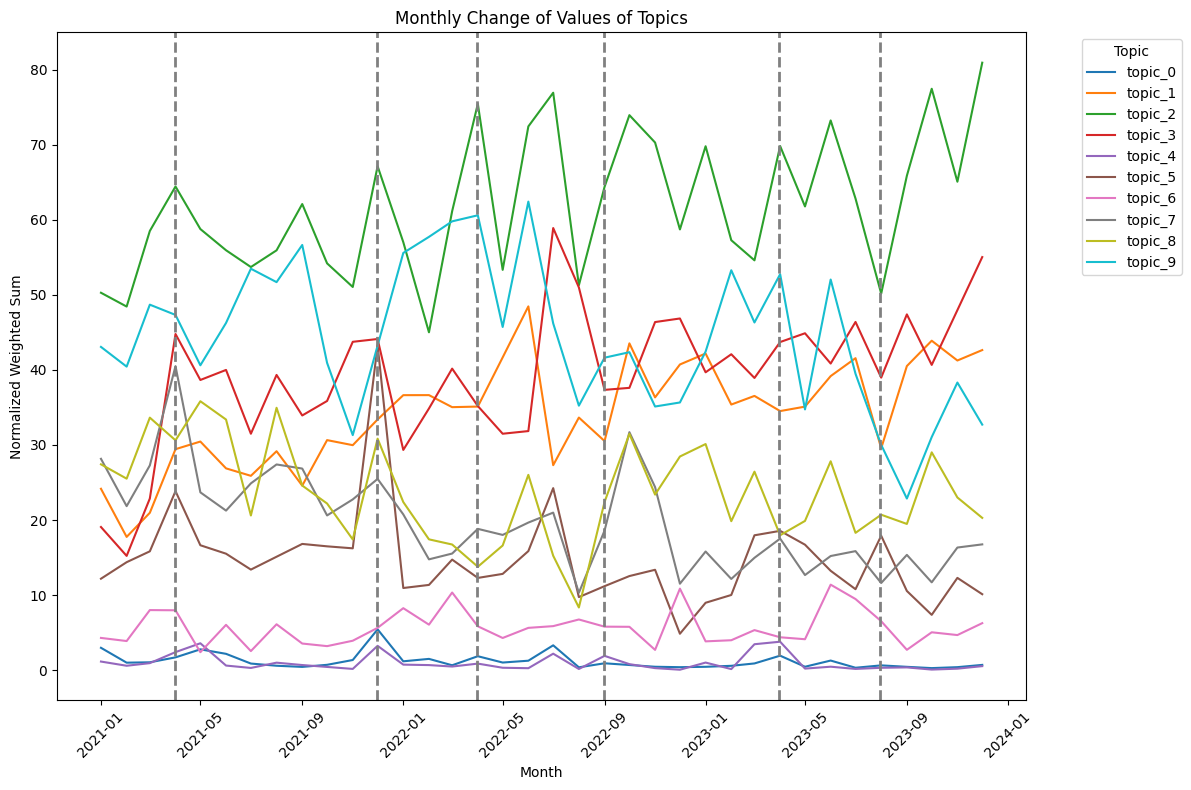

In [ ]:
# Assuming 'combined_results' is your DataFrame from the previous step
# Ensure 'PublishTime' is either the index or a column in 'combined_results'

# If 'PublishTime' is not already a datetime column in 'combined_results', convert it
topic_by_month['PublishTime'] = pd.to_datetime(topic_by_month['PublishTime'].astype(str))

# Melt the DataFrame to long format for easier plotting with seaborn
long_format = topic_by_month.melt(id_vars=['PublishTime'], var_name='Topic', value_name='Value')

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=long_format, x='PublishTime', y='Value', hue='Topic')

# Add vertical lines for each peak month
for peak in peak_month_indices:
    plt.axvline(x=peak, color='gray', linestyle='--', lw=2)

plt.title('Monthly Change of Values of Topics')
plt.xlabel('Month')
plt.ylabel('Normalized Weighted Sum')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust subplot parameters for a better fit
plt.show()

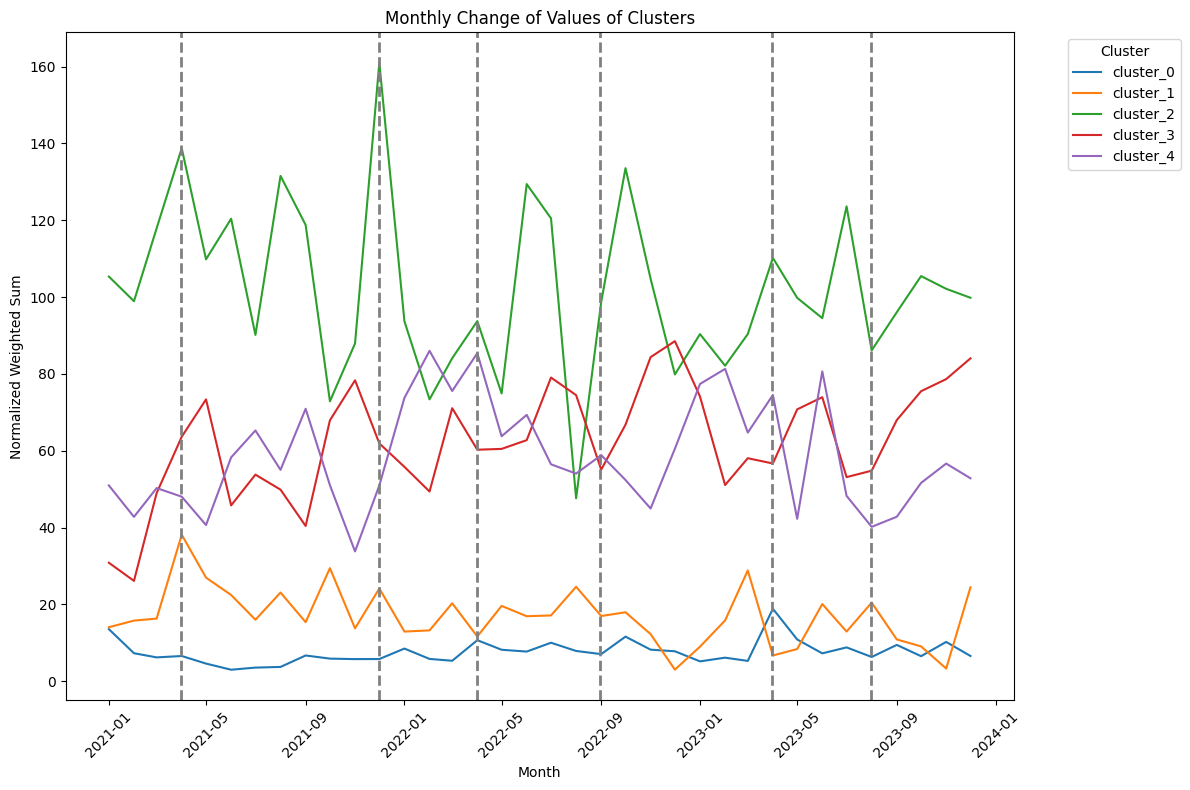

In [ ]:
# Assuming 'combined_results' is your DataFrame from the previous step
# Ensure 'PublishTime' is either the index or a column in 'combined_results'

# If 'PublishTime' is not already a datetime column in 'combined_results', convert it
cluster_by_month['PublishTime'] = pd.to_datetime(cluster_by_month['PublishTime'].astype(str))

# Melt the DataFrame to long format for easier plotting with seaborn
long_format = cluster_by_month.melt(id_vars=['PublishTime'], var_name='Cluster', value_name='Value')

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=long_format, x='PublishTime', y='Value', hue='Cluster')

# Add vertical lines for each peak month
for peak in peak_month_indices:
    plt.axvline(x=peak, color='gray', linestyle='--', lw=2)

plt.title('Monthly Change of Values of Clusters')
plt.xlabel('Month')
plt.ylabel('Normalized Weighted Sum')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust subplot parameters for a better fit
plt.show()

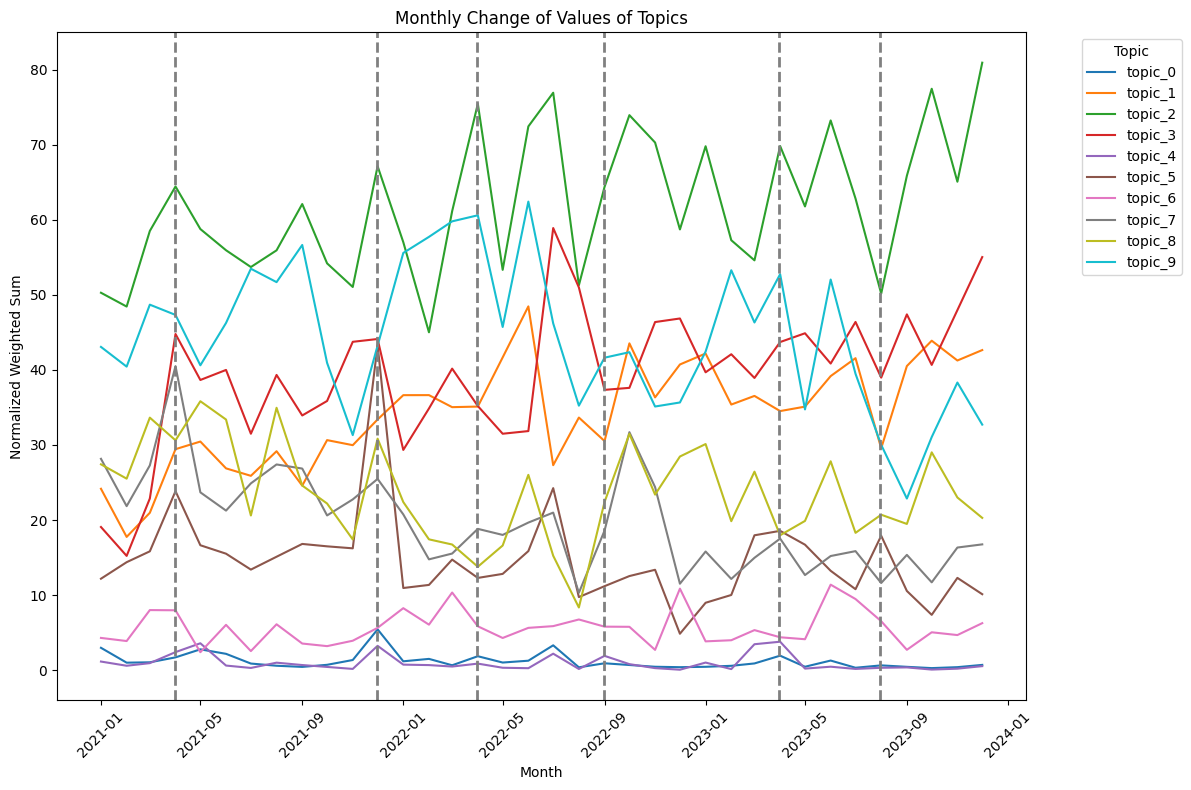

In [ ]:
# Assuming 'combined_results' is your DataFrame from the previous step
# Ensure 'PublishTime' is either the index or a column in 'combined_results'

# If 'PublishTime' is not already a datetime column in 'combined_results', convert it
topic_by_month['PublishTime'] = pd.to_datetime(topic_by_month['PublishTime'].astype(str))

# Melt the DataFrame to long format for easier plotting with seaborn
long_format = topic_by_month.melt(id_vars=['PublishTime'], var_name='Topic', value_name='Value')

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=long_format, x='PublishTime', y='Value', hue='Topic')

# Add vertical lines for each peak month
for peak in peak_month_indices:
    plt.axvline(x=peak, color='gray', linestyle='--', lw=2)

plt.title('Monthly Change of Values of Topics')
plt.xlabel('Month')
plt.ylabel('Normalized Weighted Sum')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust subplot parameters for a better fit
plt.show()

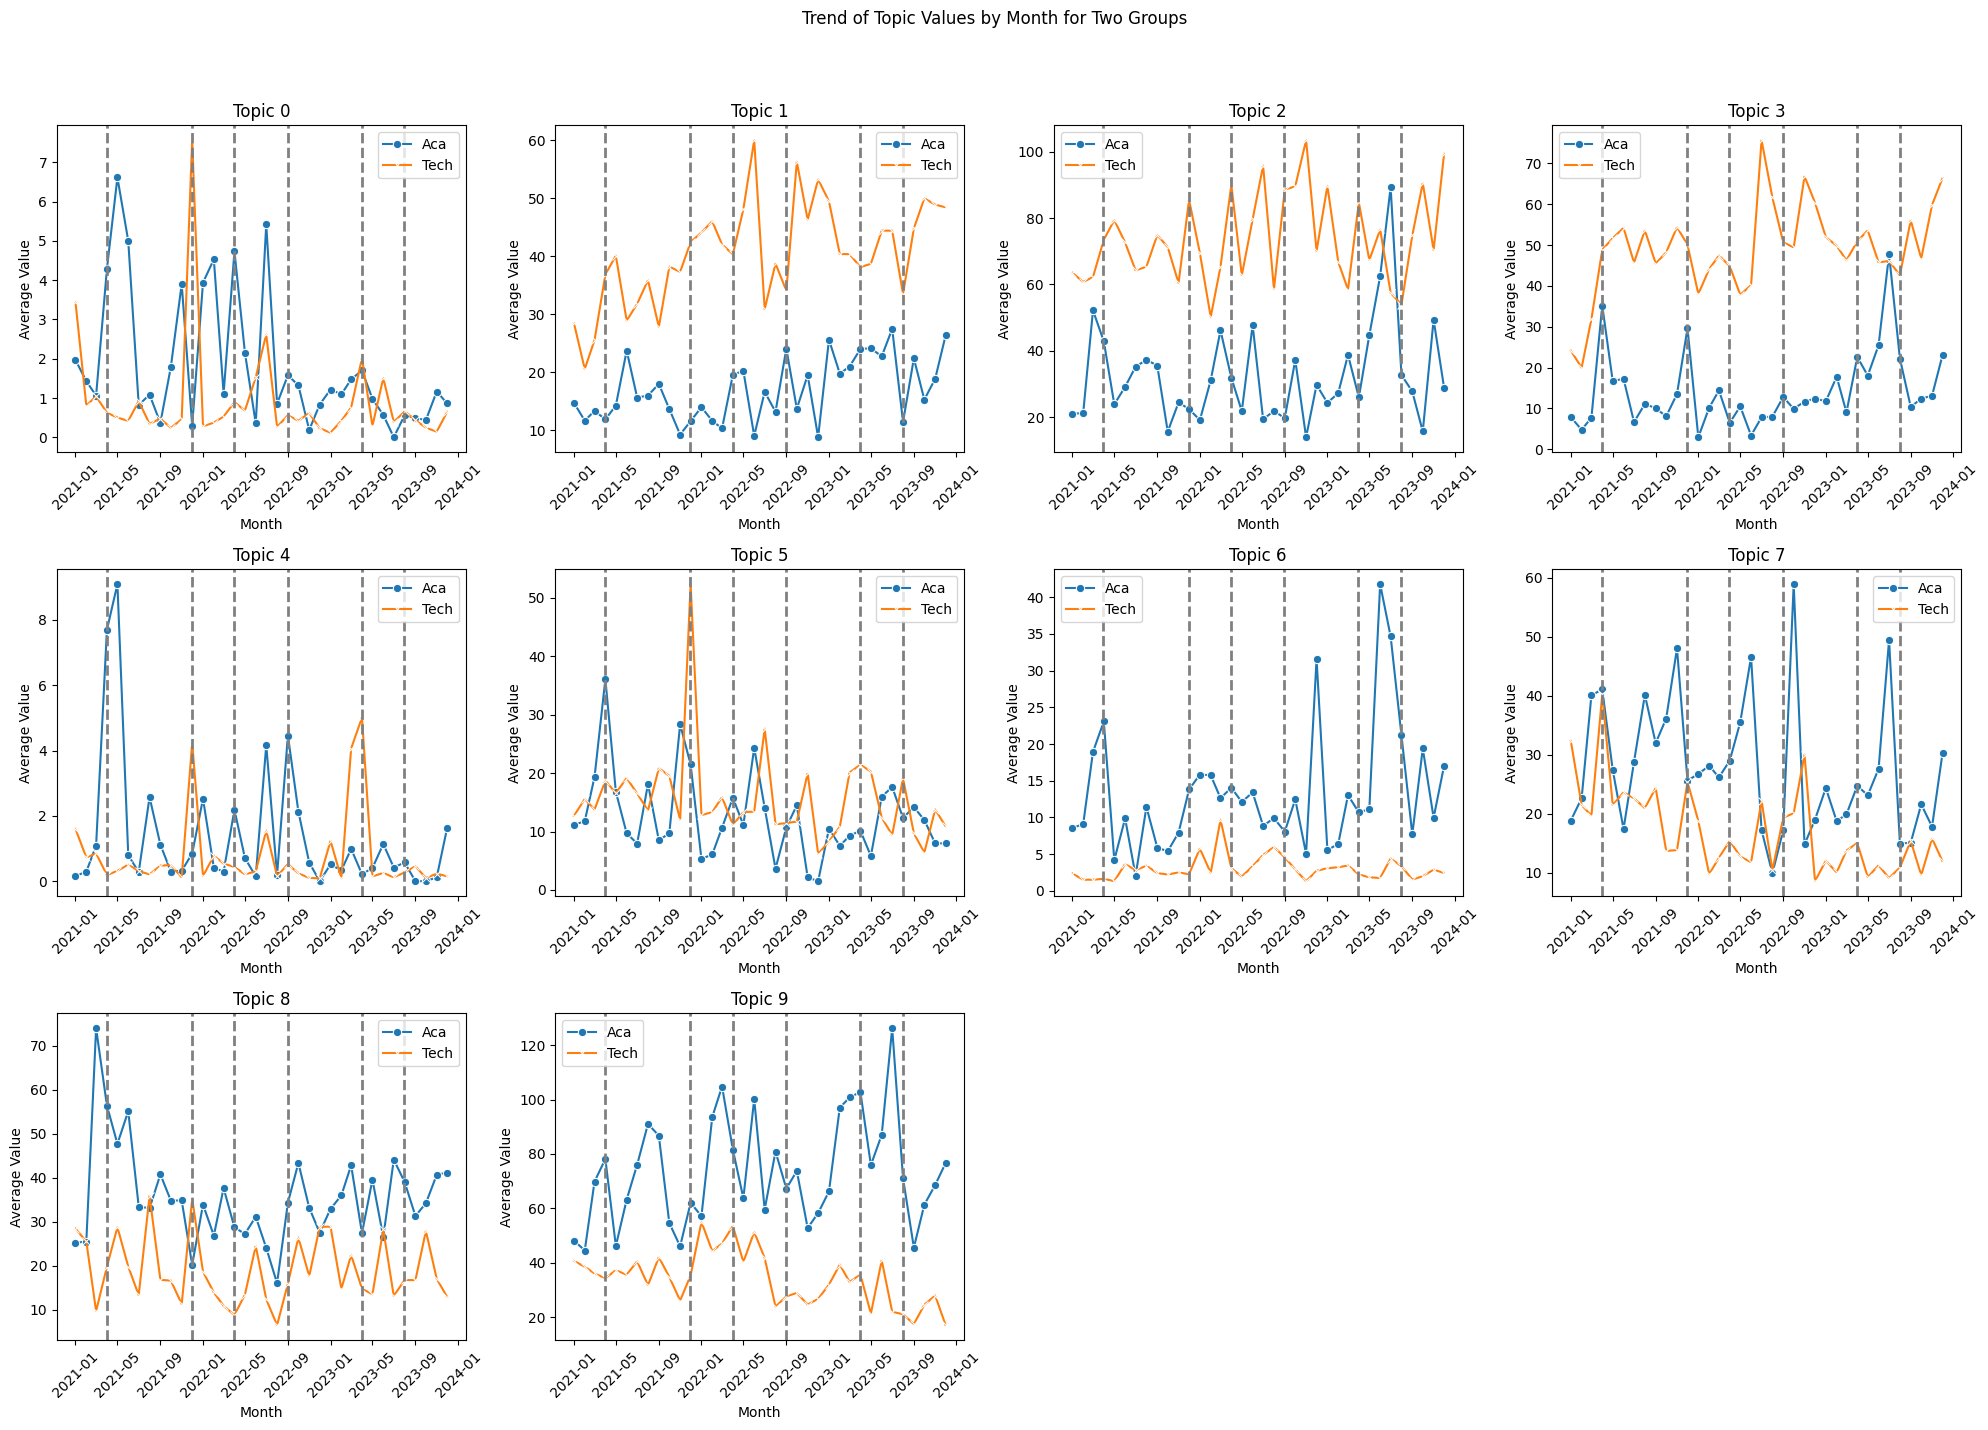

In [ ]:
# Assuming peak_month_indices and the data preparation steps are correct

# Initialize the figure for the 3x4 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
fig.suptitle('Trend of Topic Values by Month for Two Groups')

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each topic to create a subplot for it
for i in range(10):
    column_name = f'topic_{i}'

    # Ensure 'PublishTime' is in datetime format
    aca_topic_trend = aca_topic_by_month[['PublishTime', column_name]].copy()
    tech_topic_trend = tech_topic_by_month[['PublishTime', column_name]].copy()

    # Convert 'PublishTime' from PeriodDtype to datetime
    aca_topic_trend['PublishTime'] = aca_topic_trend['PublishTime'].dt.to_timestamp()
    tech_topic_trend['PublishTime'] = tech_topic_trend['PublishTime'].dt.to_timestamp()

    # aca_topic_trend['PublishTime'] = pd.to_datetime(aca_topic_trend['PublishTime'])
    # tech_topic_trend['PublishTime'] = pd.to_datetime(tech_topic_trend['PublishTime'])

    # Convert to "long" format not necessary if you're directly plotting with x and y
    # Plotting the trends for the two groups, specifying 'ax' to direct the plot to the correct subplot
    sns.lineplot(data=aca_topic_trend, x='PublishTime', y=column_name, ax=axes[i], marker='o', label='Aca', dashes=False)
    sns.lineplot(data=tech_topic_trend, x='PublishTime', y=column_name, ax=axes[i], marker='x', label='Tech', dashes=False)

    # Add vertical lines for each peak month
    for peak in peak_month_indices:
        axes[i].axvline(x=peak, color='gray', linestyle='--', lw=2)

    axes[i].set_title(f'Topic {i}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Average Value')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Hide the empty subplots
for j in range(10, 12):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.show()


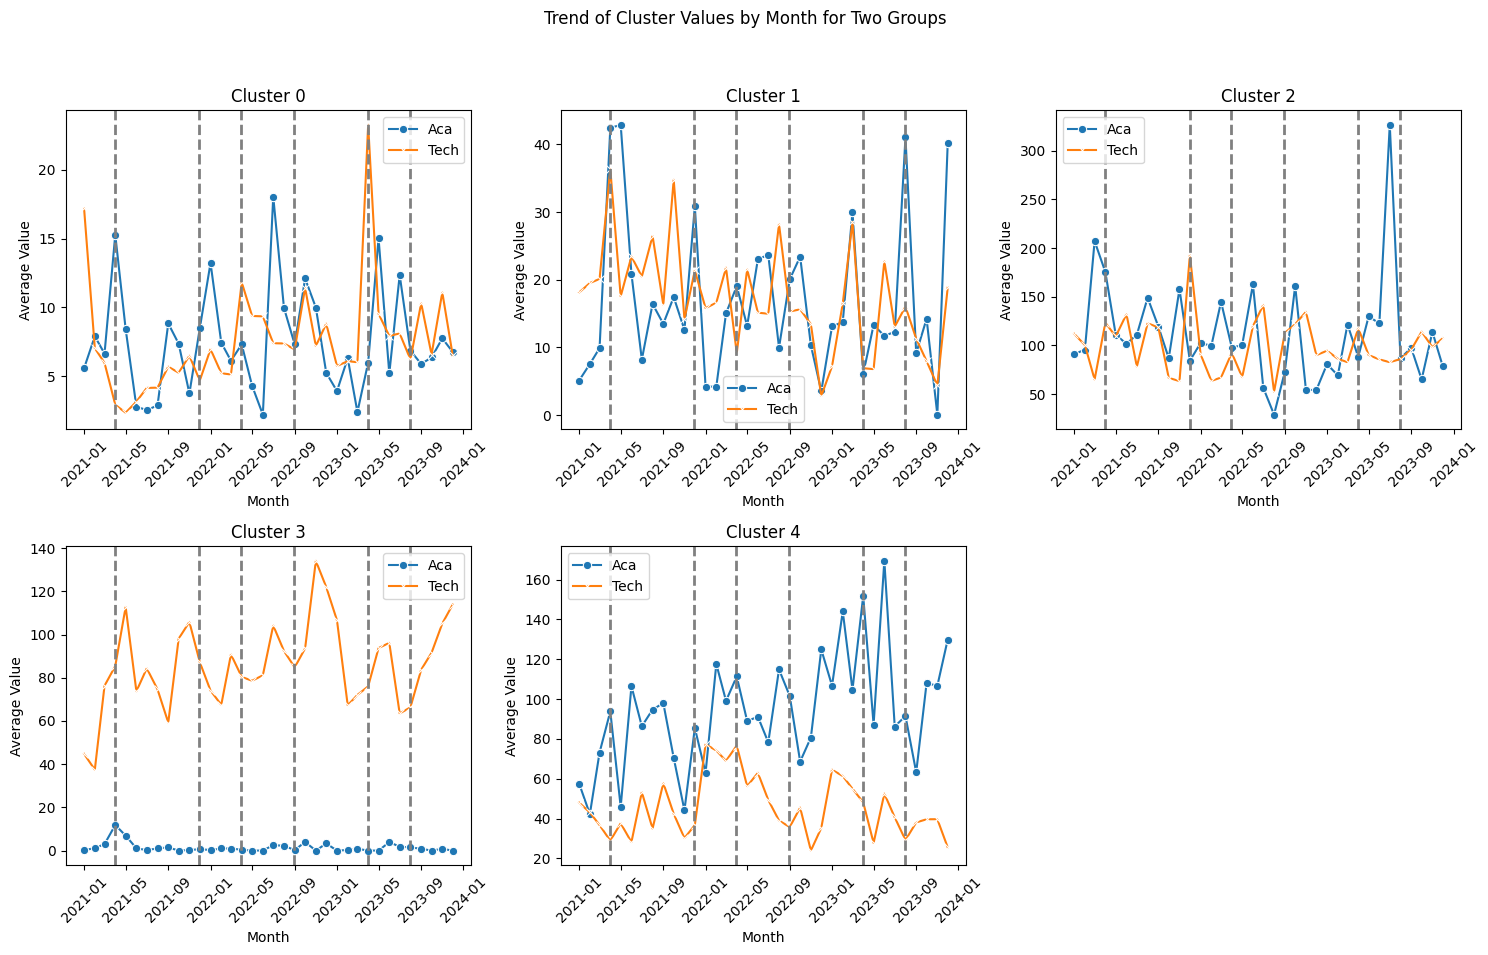

In [ ]:
# Assuming peak_month_indices and the data preparation steps are correct

# Initialize the figure for the 3x4 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Trend of Cluster Values by Month for Two Groups')

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each cluster to create a subplot for it
for i in range(5):
    column_name = f'cluster_{i}'

    # Ensure 'PublishTime' is in datetime format
    aca_cluster_trend = aca_cluster_by_month[['PublishTime', column_name]].copy()
    tech_cluster_trend = tech_cluster_by_month[['PublishTime', column_name]].copy()

    # Convert 'PublishTime' from PeriodDtype to datetime
    aca_cluster_trend['PublishTime'] = aca_cluster_trend['PublishTime'].dt.to_timestamp()
    tech_cluster_trend['PublishTime'] = tech_cluster_trend['PublishTime'].dt.to_timestamp()

    # Convert to "long" format not necessary if you're directly plotting with x and y
    # Plotting the trends for the two groups, specifying 'ax' to direct the plot to the correct subplot
    sns.lineplot(data=aca_cluster_trend, x='PublishTime', y=column_name, ax=axes[i], marker='o', label='Aca', dashes=False)
    sns.lineplot(data=tech_cluster_trend, x='PublishTime', y=column_name, ax=axes[i], marker='x', label='Tech', dashes=False)

    # Add vertical lines for each peak month
    for peak in peak_month_indices:
        axes[i].axvline(x=peak, color='gray', linestyle='--', lw=2)

    axes[i].set_title(f'Cluster {i}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Average Value')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Hide the empty subplots
fig.delaxes(axes[5])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.show()


## Similarity between the two copora



In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
!pip install git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-7vi9xgfr
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-7vi9xgfr
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done


In [2]:
import pandas as pd
import numpy as np


In [3]:
# import the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/DBCommunity/saved_data/whole_data.csv", index_col='Unnamed: 0')

In [5]:
df.columns

Index(['Title', 'Text', 'Author', 'Reply', 'LastReply', 'PublishTime', 'Like',
       'Collect', 'Repost', 'Community_name', 'seg_text', 'tokenized_text',
       'Reply_Year', 'Reply_Month', 'Reply_Day', 'Pub_Year', 'Pub_Month',
       'Pub_Day', 'normalized_text', 'tokenized_sentences', 'TopPost',
       'Length', 'Aca', 'doc_embedding', 'cluster_wordembedding', 'cluster_0',
       'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'Title.1', 'topics',
       'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9', 'IsPeakMonth', 'IsPeakWeek',
       'IsPeakDay'],
      dtype='object')

In [6]:
df['normalized_text'] = df['normalized_text'].apply(lambda x: eval(x))

In [7]:
days = sorted(list(set(df['PublishTime'])))

In [8]:
df['PublishTime'] = pd.to_datetime(df['PublishTime'])

In [9]:
def get_same_day_corpora(df, day):

    # For ACA words, ensuring words are kept intact
    acaWords = set(
        word  # Take each word as is
        for tokens_list in df[(df['PublishTime'] == day) | (df['Aca'] == 1)]['normalized_text']  # For each list of words in rows
        for word in tokens_list  # For each word in the list
    )

    # For Tech words, with the same emphasis
    techWords = set(
        word  # Take each word as is
        for tokens_list in df[(df['PublishTime'] == day) | (df['Aca'] == 0)]['normalized_text']  # For each list of words in rows
        for word in tokens_list  # For each word in the list
    )

    acaColumn = df[(df['PublishTime'] == day) | (df['Aca'] == 1)]['normalized_text']
    techColumn = df[(df['PublishTime'] == day) | (df['Aca'] == 0)]['normalized_text']

    return acaWords, techWords, acaColumn, techColumn

In [10]:
def get_same_month_corpora(df, year, month):

    acaColumn = df[(df['Pub_Year'] == year) | (df['Pub_Month'] == month) | (df['Aca'] == 1)]['normalized_text']
    techColumn = df[(df['Pub_Year'] == year) | (df['Pub_Month'] == month) | (df['Aca'] == 0)]['normalized_text']

    # For ACA words, ensuring words are kept intact
    acaWords = set(
        word  # Take each word as is
        for tokens_list in acaColumn  # For each list of words in rows
        for word in tokens_list  # For each word in the list
    )

    # For Tech words, with the same emphasis
    techWords = set(
        word  # Take each word as is
        for tokens_list in techColumn  # For each list of words in rows
        for word in tokens_list  # For each word in the list
    )


    return acaWords, techWords, acaColumn, techColumn

In [10]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

In [12]:
from datetime import datetime

In [27]:
import scipy.stats

day_divergence = {}

for i in range(1, 32):
    days_of_month = [day for day in days if datetime.strptime(day, '%Y-%m-%d').day == i]
    df_day = df[df['Pub_Day'] == i]

    for day in days_of_month:
        # Initialize acaWords and techWords to empty sets at the start of each iteration
        acaWords = set()
        techWords = set()

        try:
            # Attempt to get the corpora
            acaWords, techWords, acaColumn, techColumn = get_same_day_corpora(df_day, day)
        except ValueError as e:
            # Log the exception or handle it as needed
            print(f"Error processing {day}: {e}")
            continue  # Skip to the next iteration if an error occurs

        overlapWords = acaWords & techWords
        overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
        print(day, "1")

        acaProbArray = makeProbsArray(acaColumn, overlapWordsDict)
        techProbArray = makeProbsArray(techColumn, overlapWordsDict)
        print(day, "2")

        aca_techDivergence = scipy.stats.entropy(acaProbArray, techProbArray)
        day_divergence[day] = aca_techDivergence

print(day_divergence)


2021-01-01 1
2021-01-01 2
2021-02-01 1
2021-02-01 2
2021-03-01 1
2021-03-01 2
2021-04-01 1
2021-04-01 2
2021-05-01 1
2021-05-01 2
2021-06-01 1
2021-06-01 2
2021-07-01 1
2021-07-01 2
2021-08-01 1
2021-08-01 2
2021-09-01 1
2021-09-01 2
2021-10-01 1
2021-10-01 2
2021-11-01 1
2021-11-01 2
2021-12-01 1
2021-12-01 2
2022-01-01 1
2022-01-01 2
2022-02-01 1
2022-02-01 2
2022-03-01 1
2022-03-01 2
2022-04-01 1
2022-04-01 2
2022-05-01 1
2022-05-01 2
2022-06-01 1
2022-06-01 2
2022-07-01 1
2022-07-01 2
2022-08-01 1
2022-08-01 2
2022-09-01 1
2022-09-01 2
2022-10-01 1
2022-10-01 2
2022-11-01 1
2022-11-01 2
2022-12-01 1
2022-12-01 2
2023-01-01 1
2023-01-01 2
2023-02-01 1
2023-02-01 2
2023-03-01 1
2023-03-01 2
2023-04-01 1
2023-04-01 2
2023-05-01 1
2023-05-01 2
2023-06-01 1
2023-06-01 2
2023-07-01 1
2023-07-01 2
2023-08-01 1
2023-08-01 2
2023-09-01 1
2023-09-01 2
2023-10-01 1
2023-10-01 2
2023-11-01 1
2023-11-01 2
2023-12-01 1
2023-12-01 2
2021-01-02 1
2021-01-02 2
2021-02-02 1
2021-02-02 2
2021-03-02 1

In [19]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pd.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pd.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

AttributeError: 'Series' object has no attribute 'join'

In [37]:
df_divergence = pd.DataFrame(list(day_divergence.items()), columns=['PublishTime', 'divergence'])

# Convert 'PublishTime' to datetime format
df_divergence['PublishTime'] = pd.to_datetime(df_divergence['PublishTime'])

df_divergence = df_divergence.sort_values("PublishTime").reset_index()

In [43]:
df_divergence_by_month = df_divergence.groupby(pd.Grouper(key='PublishTime', freq='M')).mean()
df_divergence_by_month

,index,divergence
PublishTime,,
2021-01-31,539.225806,0.454700
2021-02-28,486.571429,0.459382
2021-03-31,541.129032,0.432038
2021-04-30,524.366667,0.453768
2021-05-31,543.096774,0.463412
2021-06-30,526.366667,0.465159
2021-07-31,545.064516,0.469894
2021-08-31,546.064516,0.461135
2021-09-30,529.366667,0.456115


In [53]:
peak_month = pd.read_csv("/content/drive/MyDrive/DBCommunity/saved_data/peak_months.csv")
peak_month['PublishTime'] = pd.to_datetime(peak_month['PublishTime'])
peak_month_indices = peak_month["PublishTime"].to_list()
peak_month_indices

[Timestamp('2021-03-31 00:00:00'),
 Timestamp('2021-11-30 00:00:00'),
 Timestamp('2022-03-31 00:00:00'),
 Timestamp('2022-08-31 00:00:00'),
 Timestamp('2023-03-31 00:00:00'),
 Timestamp('2023-07-31 00:00:00')]

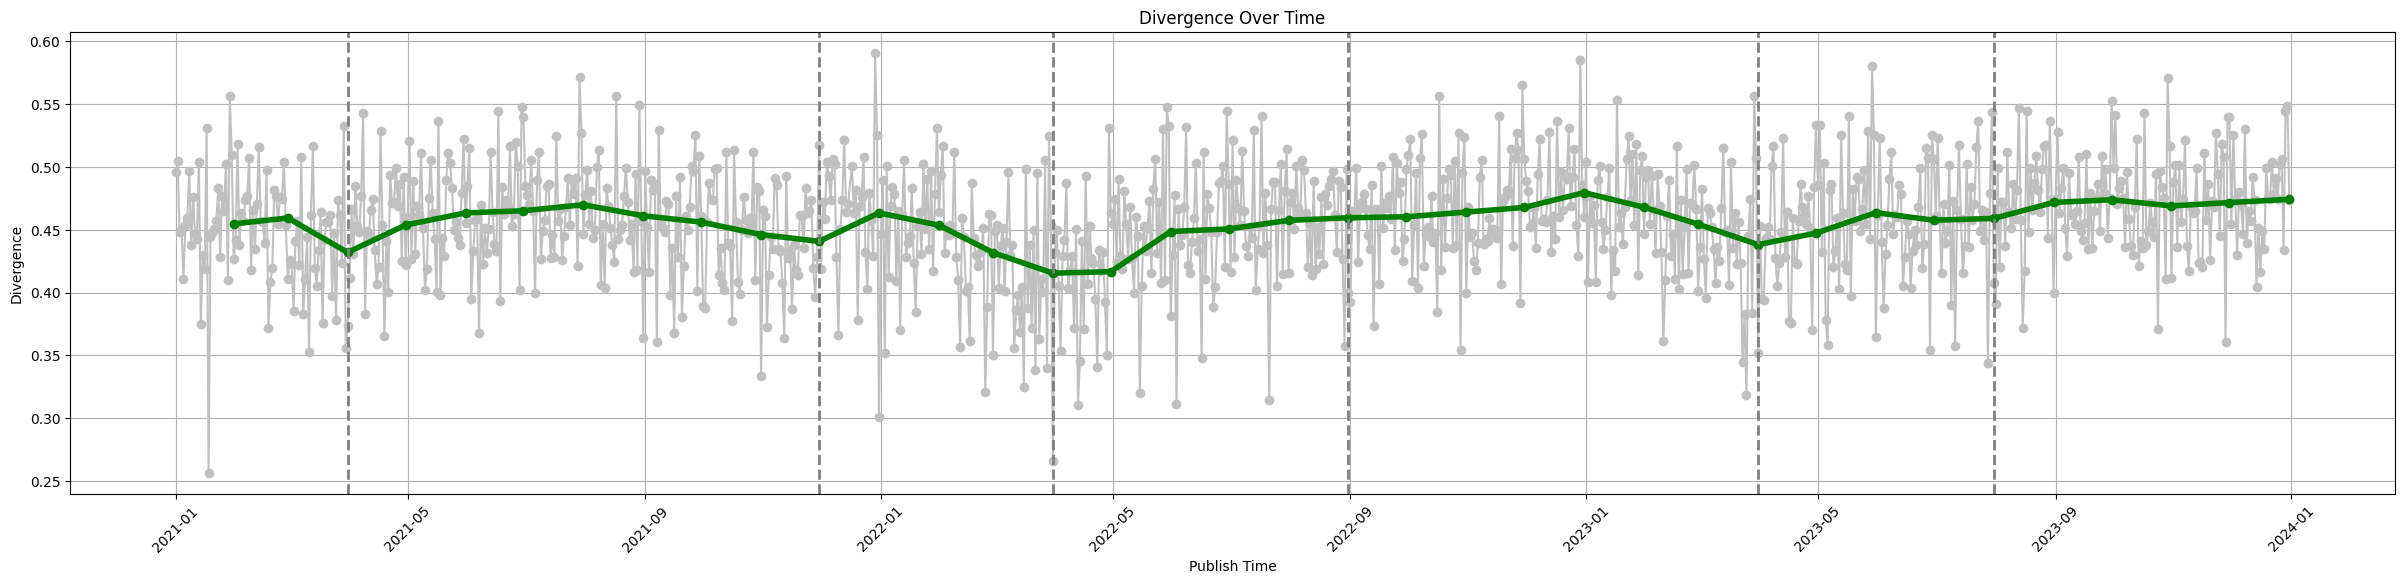

In [56]:
df_divergence_by_month = df_divergence.groupby(pd.Grouper(key='PublishTime', freq='M')).mean()

# Plotting divergence over time
plt.figure(figsize=(30, 6))
plt.plot(df_divergence['PublishTime'], df_divergence['divergence'], marker='o', linestyle='-', color='#C0C0C0')
plt.plot(df_divergence_by_month.index, df_divergence_by_month['divergence'], marker='o', linestyle='-', color='green', linewidth=4)

# Add vertical lines for each peak month
for peak in peak_month_indices:
    plt.axvline(x=peak, color='gray', linestyle='--', lw=2)

plt.title('Divergence Over Time')
plt.xlabel('Publish Time')
plt.ylabel('Divergence')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Save data

In [ ]:
df.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/whole_data.csv")

In [21]:


cluster_by_day.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/cluster_by_day.csv")
cluster_by_week.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/cluster_by_week.csv")
cluster_by_month.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/cluster_by_month.csv")
aca_cluster_by_day.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/aca_cluster_by_day.csv")
aca_cluster_by_week.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/aca_cluster_by_week.csv")
aca_cluster_by_month.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/aca_cluster_by_month.csv")
tech_cluster_by_day.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/tech_cluster_by_day.csv")
tech_cluster_by_week.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/tech_cluster_by_week.csv")
tech_cluster_by_month.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/tech_cluster_by_month.csv")

topic_by_day.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/topic_by_day.csv")
topic_by_week.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/topic_by_week.csv")
topic_by_month.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/topic_by_month.csv")
aca_topic_by_day.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/aca_topic_by_day.csv")
aca_topic_by_week.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/aca_topic_by_week.csv")
aca_topic_by_month.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/aca_topic_by_month.csv")
tech_topic_by_day.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/tech_topic_by_day.csv")
tech_topic_by_week.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/tech_topic_by_week.csv")
tech_topic_by_month.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/tech_topic_by_month.csv")



In [ ]:
peak_months.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/peak_months.csv")
peak_weeks.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/peak_weeks.csv")
peak_days.to_csv("/content/drive/MyDrive/DBCommunity/saved_data/peak_days.csv")

In [ ]:
peak_month_indices

DatetimeIndex(['2021-03-31', '2021-11-30', '2022-03-31', '2022-08-31',
               '2023-03-31', '2023-07-31'],
              dtype='datetime64[ns]', name='PublishTime', freq=None)

In [ ]:
peak_week_indices

DatetimeIndex(['2021-01-17', '2021-02-21', '2021-03-14', '2021-04-18',
               '2021-05-02', '2021-05-30', '2021-06-13', '2021-06-27',
               '2021-07-11', '2021-07-25', '2021-08-15', '2021-08-29',
               '2021-09-19', '2021-10-03', '2021-10-31', '2021-11-14',
               '2021-12-26', '2022-01-16', '2022-01-30', '2022-02-27',
               '2022-03-20', '2022-04-03', '2022-04-24', '2022-05-15',
               '2022-06-05', '2022-07-10', '2022-08-14', '2022-09-04',
               '2022-10-02', '2022-10-16', '2022-11-13', '2022-12-11',
               '2023-01-15', '2023-02-12', '2023-02-26', '2023-03-12',
               '2023-03-26', '2023-04-23', '2023-05-14', '2023-06-04',
               '2023-07-09', '2023-07-30', '2023-08-20', '2023-09-03',
               '2023-09-24', '2023-10-15', '2023-10-29', '2023-11-19',
               '2023-12-10'],
              dtype='datetime64[ns]', name='PublishTime', freq=None)

In [ ]:
peak_day_indices

DatetimeIndex(['2021-01-04', '2021-01-08', '2021-01-14', '2021-01-19',
               '2021-01-21', '2021-01-23', '2021-01-26', '2021-01-28',
               '2021-01-30', '2021-02-02',
               ...
               '2023-11-25', '2023-11-28', '2023-12-01', '2023-12-04',
               '2023-12-07', '2023-12-14', '2023-12-18', '2023-12-21',
               '2023-12-23', '2023-12-27'],
              dtype='datetime64[ns]', name='PublishTime', length=312, freq=None)